In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def sample_plot(X, y, index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

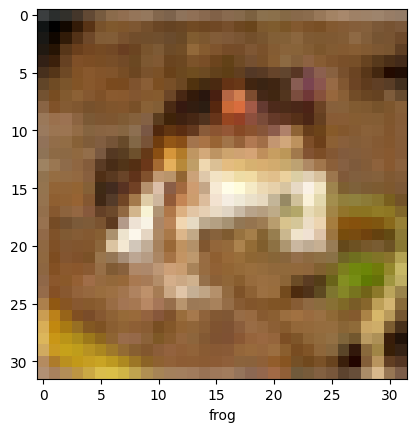

In [7]:
sample_plot(X_train, y_train, 0)

In [8]:
X_train = X_train/255 #To normalize the image data we divide the rgb values by 255
X_test = X_test/255

In [9]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])
#sigmoid activation function in otput is generally used when we have binary classification
#whereas in case of multi class classification we generalyy use softmax activation function

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

#When we have a single output value (such as y = 3), we use sparse_categorical_crossentropy
#whereas when we have an array of output value (such as y = [1,0,1,3,1,2,5])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8063 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6149 - accuracy: 0.4298
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5339 - accuracy: 0.4587
Epoch 4/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4723 - accuracy: 0.4807
Epoch 5/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4220 - accuracy: 0.5012


In [10]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.4996 - accuracy: 0.4521


[1.4995558261871338, 0.45210000872612]

In [11]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.64      0.59      0.61      1000
           2       0.50      0.12      0.19      1000
           3       0.33      0.40      0.36      1000
           4       0.26      0.74      0.39      1000
           5       0.51      0.26      0.34      1000
           6       0.60      0.34      0.43      1000
           7       0.68      0.35      0.46      1000
           8       0.51      0.69      0.59      1000
           9       0.68      0.42      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.44     10000
weighted avg       0.52      0.45      0.44     10000



In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8077 - accuracy: 0.3582
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6203 - accuracy: 0.4295
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5381 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4748 - accuracy: 0.4818
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4261 - accuracy: 0.4980


In [13]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4847 - accuracy: 0.4772


[1.4847458600997925, 0.4772000014781952]

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5020 - accuracy: 0.4581
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1723 - accuracy: 0.5880
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0395 - accuracy: 0.6360
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9543 - accuracy: 0.6659
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8912 - accuracy: 0.6890
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8398 - accuracy: 0.7060
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7986 - accuracy: 0.7195
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7667 - accuracy: 0.7297
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7302 - accuracy: 0.7440
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [15]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9526 - accuracy: 0.6825


[0.952642560005188, 0.6825000047683716]

In [16]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.87      0.74      0.80      1000
           2       0.61      0.53      0.56      1000
           3       0.54      0.47      0.50      1000
           4       0.62      0.62      0.62      1000
           5       0.71      0.43      0.54      1000
           6       0.69      0.82      0.75      1000
           7       0.65      0.81      0.72      1000
           8       0.76      0.80      0.78      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



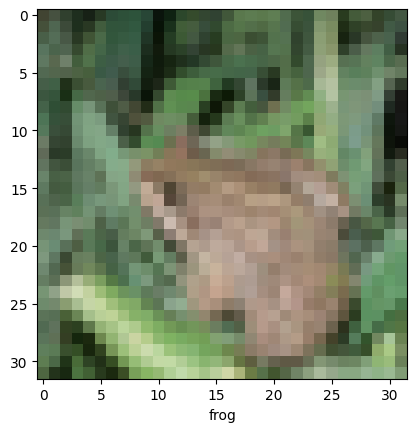

In [17]:
y_test = y_test.reshape(-1,) 
sample_plot(X_test, y_test, 4)

In [18]:

i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0     

In [19]:
model.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

In [20]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.2917 - accuracy: 0.5550
Epoch 2/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.8463 - accuracy: 0.7056
Epoch 3/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.6944 - accuracy: 0.7606
Epoch 4/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.5858 - accuracy: 0.7983
Epoch 5/10
1563/1563 [==============================] - 137s 88ms/step - loss: 0.4969 - accuracy: 0.8279
Epoch 6/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.4219 - accuracy: 0.8542
Epoch 7/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.3579 - accuracy: 0.8772
Epoch 8/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.3038 - accuracy: 0.8949
Epoch 9/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.2594 - accuracy: 0.9100
Epoch 10/10
1563/1563 [==============================] 

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.6687 - accuracy: 0.8162


[0.6686813235282898, 0.8162000179290771]

In [22]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 8s 25ms/step


In [23]:
y_pred_classes

[3,
 8,
 8,
 0,
 6,
 6,
 9,
 6,
 3,
 1,
 5,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 6,
 4,
 9,
 9,
 5,
 4,
 6,
 3,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 9,
 8,
 7,
 5,
 8,
 8,
 7,
 5,
 3,
 3,
 7,
 5,
 6,
 3,
 6,
 3,
 1,
 2,
 3,
 7,
 3,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 5,
 7,
 3,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 3,
 6,
 0,
 0,
 7,
 7,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 6,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 0,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 5,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 6,
 6,
 0,
 4,
 8,
 6,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 0,
 8,
 2,
 3,
 3,
 0,
 5,
 3,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 3,
 9,
 4,
 5,
 9,
 6,
 4,
 3,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 5,
 3,
 1,
 1,
 8,
 9,
 0,
 6,
 9,
 8,
 4,
 2,


In [24]:
ans = [classes[i] for i in y_pred_classes]
ids = [i for i in range(1,len(ans)+1)]

In [25]:
import pandas as pd 

d = {'id':ids,"label":ans}
submission_df = pd.DataFrame(d)
submission_df.to_csv("submission.csv",index=False)